In [1]:
import pandas as pd

In [2]:
mushrooms = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter08/Dataset/agaricus-lepiota.data', header=None)

In [3]:
y_raw = mushrooms.iloc[:,0]
X_raw = mushrooms.iloc[:,1:]
y = (y_raw == 'p') * 1

In [4]:
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder()

encoder.fit(X_raw)

X = encoder.transform(X_raw).toarray()

In [5]:
#Initialize the classifier.
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

#Conduct a grid search.
from sklearn import model_selection
grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 4, 6, 8, 10, 12, 14]
}
gscv = model_selection.GridSearchCV(estimator=rfc, param_grid=grid, cv=5, scoring='accuracy')
gscv.fit(X,y)
results = pd.DataFrame(gscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head(10)

#Conduct a random search.
from scipy import stats
max_features = X.shape[1]
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=max_features)
}
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=100)
rscv.fit(X,y)
results = pd.DataFrame(rscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.401288,0.105746,0.018145,0.000748,gini,99,"{'criterion': 'gini', 'max_features': 99}",1.000000,1.0,0.996308,1.0,0.745074,0.948276,0.101611,1
25,1.404573,0.187588,0.018159,0.002051,gini,106,"{'criterion': 'gini', 'max_features': 106}",1.000000,1.0,0.996308,1.0,0.745074,0.948276,0.101611,1
29,1.443919,0.185760,0.017346,0.000790,gini,111,"{'criterion': 'gini', 'max_features': 111}",1.000000,1.0,0.995692,1.0,0.739532,0.947045,0.103770,3
41,1.394833,0.203771,0.017351,0.001018,gini,105,"{'criterion': 'gini', 'max_features': 105}",1.000000,1.0,0.996308,1.0,0.737685,0.946798,0.104567,4
10,1.518155,0.186860,0.018357,0.001014,gini,108,"{'criterion': 'gini', 'max_features': 108}",1.000000,1.0,0.996308,1.0,0.737685,0.946798,0.104567,4
18,0.303396,0.012799,0.020744,0.001323,gini,5,"{'criterion': 'gini', 'max_features': 5}",0.842462,1.0,1.000000,1.0,0.862685,0.941029,0.072507,6
15,0.286448,0.007439,0.019943,0.000889,gini,5,"{'criterion': 'gini', 'max_features': 5}",0.842462,1.0,1.000000,1.0,0.862685,0.941029,0.072507,6
46,1.523486,0.177210,0.020745,0.002778,gini,107,"{'criterion': 'gini', 'max_features': 107}",1.000000,1.0,0.996308,1.0,0.708128,0.940887,0.116388,8
49,0.379801,0.017926,0.020743,0.001160,entropy,11,"{'criterion': 'entropy', 'max_features': 11}",0.842462,1.0,1.000000,1.0,0.860837,0.940660,0.072909,9
39,0.462093,0.022106,0.018751,0.000745,gini,18,"{'criterion': 'gini', 'max_features': 18}",0.842462,1.0,1.000000,1.0,0.841749,0.936842,0.077353,10


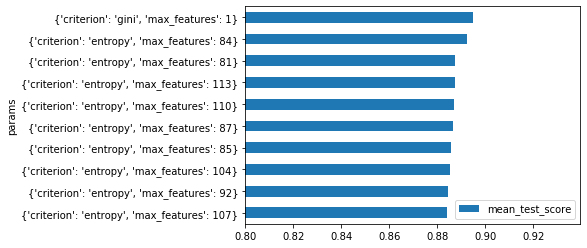

In [6]:
results.loc[:,'params'] = results.loc[:,'params'].astype(str)

(
    results.sort_values('rank_test_score', ascending=False)
    .loc[:,['params','mean_test_score']]
    .drop_duplicates()
    .head(10)
    .plot.barh(x='params', xlim=(0.8))
)